In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.assignment2 as im

%matplotlib notebook

# 1 Image Shift

## Question 1

In [2]:
def shift(x, k, l, boundary):

    n1, n2 = x.shape[:2]
    if boundary is 'periodical_naive':
        xshifted = np.zeros(x.shape)
        # Main part
        for i in range(max(-k, 0), min(n1-k, n1)):
            for j in range(max(-l, 0), min(n2-l, n2)):
                xshifted[i, j] = x[i + k, j + l]
        # Corners
        for i in range(n1 - k, n1):
            for j in range(n2 - l, n2):
                xshifted[i, j] = x[i + k - n1, j + l - n2]
        for i in range(n1 - k, n1):
            for j in range(0, -l):
                xshifted[i, j] = x[i + k - n1, j + l + n2]
        return xshifted

    if boundary is 'periodical':
        xshifted = np.zeros(x.shape)
        irange = np.mod(np.arange(n1) + k, n1)
        jrange = np.mod(np.arange(n2) + l, n2)
        xshifted = x[irange, :][:, jrange]
        return xshifted
    k = -k
    l = -l
    if boundary is 'extension':
        xshifted = np.zeros(x.shape)
        irange = np.pad(np.arange(max(0,-k),min(n1-k,n1)),(max(k,0),max(0,-k)), 'constant', constant_values=(0, n1-1))
        jrange = np.pad(np.arange(max(0,-l),min(n2-l,n2)),(max(l,0),max(0,-l)), 'constant', constant_values=(0, n2-1))
        xshifted = x[irange, :][:, jrange]
        return xshifted
    
    if boundary is 'mirror':
        xshifted = np.zeros(x.shape)
        irange = np.pad(np.arange(max(0,-k),min(n1-k,n1)),(max(k,0),max(0,-k)), 'reflect')
        jrange = np.pad(np.arange(max(0,-l),min(n2-l,n2)),(max(l,0),max(0,-l)), 'reflect')
        xshifted = x[irange, :][:, jrange]
        return xshifted



In [3]:
x = plt.imread('assets/windmill.png')
x_shift_mirror = shift(x, 100, -50,'mirror')
x_shift_periodical = shift(x, 100, -50,'periodical')
x_shift_extenstion = shift(x, 100, -50,'extension')

## Question 2

Testing the functions

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


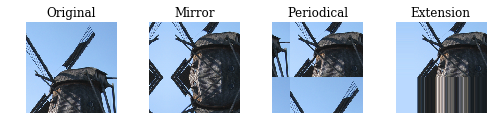

In [4]:
import imagetools as im
fig, axes = plt.subplots(ncols=4, figsize=(7, 2))
im.show(x, ax=axes[0])
axes[0].set_title('Original')
im.show(x_shift_mirror, ax=axes[1])
axes[1].set_title('Mirror')
im.show(x_shift_periodical, ax=axes[2])
axes[2].set_title('Periodical')
im.show(x_shift_extenstion, ax=axes[3])
axes[3].set_title('Extension')
fig.show()

## Question 3
Is the shifting operation linear?

In [5]:
y = plt.imread('assets/lake.png')
# shift(a * x + b * y, k, l) = a * shift(x, k, l) + b * shift(y, k, l)
lhs = shift(3*x+0.8*y, -50,100,'periodical')
rhs = 3*shift(x, -50,100,'periodical')+ 0.8*shift(y, -50,100,'periodical')
print('For a periodical shift linearity is ',np.array_equal(lhs, rhs))

lhs = shift(0.2*x+0.8*y, -50,100,'mirror')
rhs = 0.2*shift(x, -50,100,'mirror')+ 0.8*shift(y, -50,100,'mirror')
print('For a mirror shift linearity is ',np.array_equal(lhs, rhs))

lhs = shift(0.2*x+0.8*y, -50,100,'extension')
rhs = 0.2*shift(x, -50,100,'extension')+ 0.8*shift(y, -50,100,'extension')
print('For an extension shift linearity is ',np.array_equal(lhs, rhs))

For a periodical shift linearity is  True
For a mirror shift linearity is  True
For an extension shift linearity is  True


## Question 4
One-to-one shift for the periodical shift, the nullspace of this operation is empty.

For the rest, the shit is not one to one and the nullspace is the elements in the shited region that are lost (move out of frame) in the shifting operation.

In [22]:
forward = shift(x, 100, -50,'periodical')
backward = shift(forward, -100, +50,'periodical')
np.allclose(x,backward)

True

In [23]:
def kernel(name, tau, eps=1e-3):
    if name is 'gaussian':
        i =0
        while (np.exp(-(i**2)/(2*tau**2)) >eps):
            i+=1
        
        nx = i-1
        ny =i-1
        #points in the range
        i = np.arange(-nx, nx+1, 1)
        j = np.arange(-ny, ny+1, 1)
        
        #create a grid and evaluate the kernel atevery i,j
        xx, yy = np.meshgrid(i, j, indexing='ij')
        f_ij = np.exp(-(xx**2+yy**2 )/(2*tau**2)) 
                  
        
    if name is 'exponential':
        i =0
        while (np.exp(-np.sqrt((i**2))/(tau)) >eps):
            i+=1
        
        nx = i-1
        ny =i-1
        #points in the range
        i = np.arange(-nx, nx+1, 1)
        j = np.arange(-ny, ny+1, 1)
        #create a grid and evaluate the kernel atevery i,j
        xx, yy = np.meshgrid(i, j, indexing='ij')
        f_ij = np.exp(np.sqrt(xx**2 + yy**2)/-tau) 
        
    
    if name is 'box':
        f_ij =np.ones((tau,tau))
    
    
    Z =np.sum(f_ij)
    nu = (1/Z)*f_ij
    return nu

In [46]:
nu = kernel('exponential', 1, 1e-3)
nu.shape

(13, 13)

## Question 6
Performing the naive convolution

In [12]:
def convolve_naive(x, nu):
    n1, n2 = x.shape[:2]
    s1 = int((nu.shape[0] - 1) / 2)
    s2 = int((nu.shape[1] - 1) / 2)
    xconv = np.zeros(x.shape)
    for i in range(s1, n1-s1):
        for j in range(s2, n2-s2):
            
            for k in range(-s1, s1+1):
                for l in range(-s2, s2+1):
                    # complete
#                     print(i-k, j-l)
                    xconv[i,j] += (nu[k,l]*x[i-k,j-l])
    return xconv
             
                    

In [29]:
start = time.time()
xconv =convolve_naive(x,nu)
end= time.time()
print("Time taken by convolve naive is ",(end-start))
xconv.shape

Time taken by convolve naive is  19.90034294128418


(256, 256, 3)

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


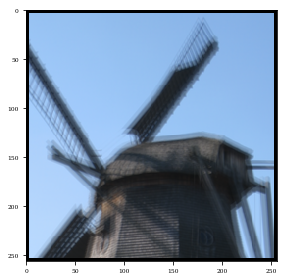

In [14]:
plt.imshow(xconv)

## Question 7

In [15]:
def convolve(x, nu, boundary):
    n1, n2 = x.shape[:2]
    s1 = int((nu.shape[0] - 1) / 2)
    s2 = int((nu.shape[1] - 1) / 2)
    xconv = np.zeros(x.shape)
    for k in range(-s1, s1+1):
        for l in range(-s2, s2+1):
            # complete
            
            xshift = shift(x, -k,-l,boundary)
            xconv += (nu[k,l]*xshift)
    return xconv

Time taken by convolve is  0.09414267539978027


/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


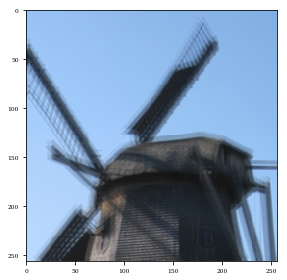

In [27]:
start0 = time.time()
xconv0 =convolve(x,nu,'mirror')
end0= time.time()
print("Time taken by convolve is ",(end0-start0))
xconv0.shape

plt.imshow(xconv0)

## Question 8

Time the two operations, naive convolution takes 19s, and the one using the spatial shift takes around 0.09s

## Question 9

Is the operation linear? The operation is linear for all boundary conditions implemented and for all the kernels.

In [52]:
lhs = convolve(21*x+8*y,nu,'periodical')
rhs = 21*convolve(x,nu,'periodical')+ 8*convolve(y,nu,'periodical')
print('For a periodical shift linearity is ',np.allclose(lhs, rhs))

For a periodical shift linearity is  True


In [48]:
lhs = convolve(0.2*x+0.8*y,nu,'extension')
rhs = 0.2*convolve(x,nu,'extension')+ 0.8*convolve(y,nu,'extension')
print('For a extension shift linearity is ',np.allclose(lhs, rhs))

For a extension shift linearity is  True


In [49]:
lhs = convolve(0.2*x+0.8*y,nu,'mirror')
rhs = 0.2*convolve(x,nu,'mirror')+ 0.8*convolve(y,nu,'mirror')
print('For a mirror shift linearity is ',np.allclose(lhs, rhs))

For a mirror shift linearity is  True
